## Setup

In [5]:
# Import dependencies
import pandas as pd
from sqlalchemy import create_engine
from config import sqlpw

ModuleNotFoundError: No module named 'config'

In [6]:
# Import PyMySQL (Not needed if mysqlclient is installed)
import pymysql
pymysql.install_as_MySQLdb()

## E - Extract Data into DataFrames

### Crypto Decoder 

In [7]:
# Use Pandas to scrape the following site and find the abbreviations for the cryptos in the list
url = 'https://en.wikipedia.org/wiki/List_of_cryptocurrencies'
cryptos = ['Bitcoin', 'Ether or "Ethereum"']

In [8]:
# Use Panda's `read_html` to parse the url
tables = pd.read_html(url)
tables

[               0         1                    2                  3  \
 0        Release    Status             Currency             Symbol   
 1           2009    Active              Bitcoin  BTC,[4][5] XBT, ₿   
 2           2011    Active             Litecoin             LTC, Ł   
 3           2011    Active             Namecoin                NMC   
 4           2011    Active            SwiftCoin                STC   
 5           2012    Active             Bytecoin                BCN   
 6           2012    Active             Peercoin                PPC   
 7           2013    Active             Dogecoin       DOGE, XDG, Ð   
 8       2013[23]    Active          Feathercoin             FTC, ₣   
 9   2013[26][27]    Active             Gridcoin                GRC   
 10          2013    Active            Primecoin                XPM   
 11          2013    Active   Ripple[34][35][36]            XRP[36]   
 12          2013    Active                  Nxt                NXT   
 13   

In [9]:
# Find the cryptocurrency DataFrame in the list of DataFrames as assign it to `df`
# Assign the columns appropriate names
df = tables[0]
df.columns = ['release', 'status', 'currency', 'symbol', 'founders', 'hash algorithm', 'prog. language', 'blockchain', 'notes']
df.head()

,release,status,currency,symbol,founders,hash algorithm,prog. language,blockchain,notes
0,Release,Status,Currency,Symbol,Founder(s),Hash algorithm,Programming language of implementation,"Cryptocurrency blockchain (PoS, PoW, or other)",Notes
1,2009,Active,Bitcoin,"BTC,[4][5] XBT, ₿",Satoshi Nakamoto[nt 1],SHA-256d[6][7],C++[8],PoW[7][9],The first and most widely used decentralized l...
2,2011,Active,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++[12],PoW,The first cryptocurrency to use Scrypt as a ha...
3,2011,Active,Namecoin,NMC,Vincent Durham[13][14],SHA-256d,C++[15],PoW,"Also acts as an alternative, decentralized DNS."
4,2011,Active,SwiftCoin,STC,Daniel Bruno,SHA-256,NaN,PoW,First block chain to support currency creation...


In [10]:
# Drop all columns except for the currency and symbol
del df['release'], df['status'], df['founders'], df['hash algorithm'], df['prog. language'], df['blockchain'],df['notes']
df

,currency,symbol
0,Currency,Symbol
1,Bitcoin,"BTC,[4][5] XBT, ₿"
2,Litecoin,"LTC, Ł"
3,Namecoin,NMC
4,SwiftCoin,STC
5,Bytecoin,BCN
6,Peercoin,PPC
7,Dogecoin,"DOGE, XDG, Ð"
8,Feathercoin,"FTC, ₣"
9,Gridcoin,GRC


In [11]:
# Drop the first row and set the index to the `currency` column
df = df.iloc[1:]
df.set_index('currency', inplace=True)
df.head()

,symbol
currency,
Bitcoin,"BTC,[4][5] XBT, ₿"
Litecoin,"LTC, Ł"
Namecoin,NMC
SwiftCoin,STC
Bytecoin,BCN


In [12]:
# Loop through the list of cryptocurrencies and store the symbols in a list.
# Use the DataFrame to perform the lookup.

symbols=[]
for currency in cryptos:
    symbols.append(df.loc[currency].symbol)
symbols

['BTC,[4][5] XBT, \u20bf', 'ETH']

In [13]:
# Clean up the symbol for Bitcoin
symbols[0]=symbols[0][0:3]
symbols

['BTC', 'ETH']

In [14]:
# Clean up the currency name for Ethereum
cryptos[1]=cryptos[1][10:18]
cryptos

['Bitcoin', 'Ethereum']

In [15]:
# Store the lists into a DataFrame
crypto_d={'Cryptocurrency':cryptos,'Symbol':symbols}
crypto_df=pd.DataFrame(crypto_d)
crypto_df

,Cryptocurrency,Symbol
0,Bitcoin,BTC
1,Ethereum,ETH


### Extract CSVs into DataFrames

In [16]:
# Extract the Bitcoin CSV and preview
csv_file = "../Resources/bitcoin_price.csv"
bitcoin_data_df = pd.read_csv(csv_file)
bitcoin_data_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [17]:
# Extract the Ethereum CSV and preview
csv_file = "../Resources/ethereum_price.csv"
ethereum_data_df = pd.read_csv(csv_file)
ethereum_data_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"
1,"Feb 19, 2018",921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000"
2,"Feb 18, 2018",973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000"
3,"Feb 17, 2018",944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000"
4,"Feb 16, 2018",934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000"


## T - Transform DataFrames

### Transform Bitcoin DataFrame

In [18]:
# Copy the Bitcoin DataFrame into a new DataFrame
new_bitcoin_data_df = bitcoin_data_df[['Date', 'Close']].copy()

# Only include the rows corresponding to dates after August 7, 2015 (beginning of Ethereum data set)
new_bitcoin_data_df = new_bitcoin_data_df.loc[0:928]

# Reset the index, rename index column to "id", and set column "id" as the index column for MySQL connection
new_bitcoin_data_df = new_bitcoin_data_df.reset_index()
new_bitcoin_data_df = new_bitcoin_data_df.rename(columns={"index": "id", "Close": f"{symbols[0]}_Close"})
new_bitcoin_data_df = new_bitcoin_data_df.set_index("id", inplace=False)
new_bitcoin_data_df

,Date,BTC_Close
id,,
0,"Feb 20, 2018",11403.70
1,"Feb 19, 2018",11225.30
2,"Feb 18, 2018",10551.80
3,"Feb 17, 2018",11112.70
4,"Feb 16, 2018",10233.90
5,"Feb 15, 2018",10166.40
6,"Feb 14, 2018",9494.63
7,"Feb 13, 2018",8598.31
8,"Feb 12, 2018",8926.57


### Transform Ethereum DataFrame

In [19]:
# Copy the Bitcoin DataFrame into a new DataFrame
new_ethereum_data_df = ethereum_data_df[['Date', 'Close']].copy()

# Reset the index, rename index column to "id", and set column "id" as the index column for MySQL connection
new_ethereum_data_df = new_ethereum_data_df.reset_index()
new_ethereum_data_df = new_ethereum_data_df.rename(columns={"index": "id", "Close": f"{symbols[1]}_Close"})
new_ethereum_data_df = new_ethereum_data_df.set_index("id", inplace=False)
new_ethereum_data_df

,Date,ETH_Close
id,,
0,"Feb 20, 2018",895.370000
1,"Feb 19, 2018",943.870000
2,"Feb 18, 2018",923.920000
3,"Feb 17, 2018",974.120000
4,"Feb 16, 2018",944.210000
5,"Feb 15, 2018",936.980000
6,"Feb 14, 2018",923.560000
7,"Feb 13, 2018",845.260000
8,"Feb 12, 2018",868.710000


### Create database connection

In [17]:
# Connect to database
connection_string = f"root:{sqlpw}@localhost/crypto_db"
engine = create_engine(f'mysql://{connection_string}')

In [18]:
# Confirm tables
engine.table_names()

['bitcoin', 'ethereum']

## L - Load DataFrames into database

In [52]:
new_bitcoin_data_df.to_sql(name='bitcoin', con=engine, if_exists='append', index=True)

In [53]:
new_ethereum_data_df.to_sql(name='ethereum', con=engine, if_exists='append', index=True)

C:\Users\lowli\Anaconda\envs\PythonData\lib\site-packages\pymysql\cursors.py:170: Warning: (1265, "Data truncated for column 'eth_close' at row 773")
  result = self._query(query)
C:\Users\lowli\Anaconda\envs\PythonData\lib\site-packages\pymysql\cursors.py:170: Warning: (1265, "Data truncated for column 'eth_close' at row 774")
  result = self._query(query)
C:\Users\lowli\Anaconda\envs\PythonData\lib\site-packages\pymysql\cursors.py:170: Warning: (1265, "Data truncated for column 'eth_close' at row 775")
  result = self._query(query)
C:\Users\lowli\Anaconda\envs\PythonData\lib\site-packages\pymysql\cursors.py:170: Warning: (1265, "Data truncated for column 'eth_close' at row 776")
  result = self._query(query)
C:\Users\lowli\Anaconda\envs\PythonData\lib\site-packages\pymysql\cursors.py:170: Warning: (1265, "Data truncated for column 'eth_close' at row 777")
  result = self._query(query)
C:\Users\lowli\Anaconda\envs\PythonData\lib\site-packages\pymysql\cursors.py:170: Warning: (1265, "D

## Visualizations

In [123]:
crypto_data_df=new_bitcoin_data_df.merge(new_ethereum_data_df, how="inner", on="Date")
crypto_data_df=crypto_data_df.sort_index(ascending=False)
crypto_data_df["BTC_ETH_Quot"]=crypto_data_df["BTC_Close"]/crypto_data_df["ETH_Close"]
crypto_data_df["BTC_ETH_Prod"]=crypto_data_df["BTC_Close"]*crypto_data_df["ETH_Close"]
crypto_data_df

,Date,BTC_Close,ETH_Close,BTC_ETH_Quot,BTC_ETH_Prod
928,"Aug 07, 2015",279.58,2.770000,100.931408,7.744366e+02
927,"Aug 08, 2015",261.00,0.753325,346.464010,1.966178e+02
926,"Aug 09, 2015",265.08,0.701897,377.662250,1.860589e+02
925,"Aug 10, 2015",264.47,0.708448,373.308980,1.873632e+02
924,"Aug 11, 2015",270.39,1.070000,252.700935,2.893173e+02
923,"Aug 12, 2015",266.38,1.220000,218.344262,3.249836e+02
922,"Aug 13, 2015",264.08,1.830000,144.306011,4.832664e+02
921,"Aug 14, 2015",265.68,1.830000,145.180328,4.861944e+02
920,"Aug 15, 2015",261.55,1.690000,154.763314,4.420195e+02
919,"Aug 16, 2015",258.51,1.570000,164.656051,4.058607e+02


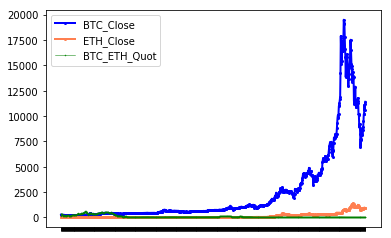

In [124]:
import matplotlib.pyplot as plt

plt.plot('Date', 'BTC_Close', data=crypto_data_df, marker='o', markersize=2, color='blue', linewidth=2)
plt.plot('Date', 'ETH_Close', data=crypto_data_df, marker='o', markersize=2, color='coral', linewidth=2)
plt.plot('Date', 'BTC_ETH_Quot', data=crypto_data_df, marker='o', markersize=0.5, color='green', linewidth=0.5)
plt.legend()
plt.gca().axes.get_xaxis().set_ticklabels([])
plt.show()

In [126]:
month_df=crypto_data_df[crypto_data_df['Date'].str.contains("2018")].iloc[31:51]
month_df

,Date,BTC_Close,ETH_Close,BTC_ETH_Quot,BTC_ETH_Prod
19,"Feb 01, 2018",9170.54,1036.79,8.845128,9.507924e+06
18,"Feb 02, 2018",8830.75,915.78,9.642873,8.087024e+06
17,"Feb 03, 2018",9174.91,964.02,9.517344,8.844797e+06
16,"Feb 04, 2018",8277.01,834.68,9.916387,6.908655e+06
15,"Feb 05, 2018",6955.27,697.95,9.965284,4.854431e+06
14,"Feb 06, 2018",7754.00,793.12,9.776579,6.149852e+06
13,"Feb 07, 2018",7621.30,757.07,10.066837,5.769858e+06
12,"Feb 08, 2018",8265.59,817.81,10.106981,6.759682e+06
11,"Feb 09, 2018",8736.98,883.87,9.884915,7.722355e+06
10,"Feb 10, 2018",8621.90,860.41,10.020688,7.418369e+06


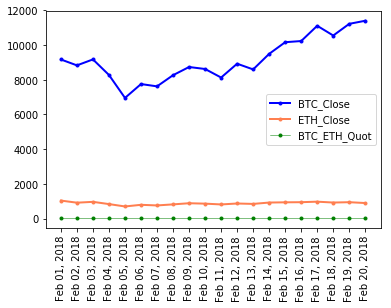

In [127]:
plt.plot('Date', 'BTC_Close', data=month_df, marker='o', markersize=3, color='blue', linewidth=2)
plt.plot('Date', 'ETH_Close', data=month_df, marker='o', markersize=3, color='coral', linewidth=2)
plt.plot('Date', 'BTC_ETH_Quot', data=month_df, marker='o', markersize=3, color='green', linewidth=0.5)
plt.legend()
plt.gca().axes.get_xaxis().set_ticklabels([])
plt.xticks(month_df['Date'], month_df['Date'], rotation='vertical')
plt.show()

In [128]:
fom_df=crypto_data_df[crypto_data_df['Date'].str.contains("01,")]
fom_df

,Date,BTC_Close,ETH_Close,BTC_ETH_Quot,BTC_ETH_Prod
903,"Sep 01, 2015",228.12,1.350000,168.977778,3.079620e+02
873,"Oct 01, 2015",237.55,0.690215,344.168122,1.639606e+02
842,"Nov 01, 2015",325.43,1.060000,307.009434,3.449558e+02
812,"Dec 01, 2015",362.49,0.874800,414.368999,3.171063e+02
781,"Jan 01, 2016",434.33,0.948024,458.142410,4.117553e+02
750,"Feb 01, 2016",373.06,2.210000,168.805430,8.244626e+02
721,"Mar 01, 2016",435.12,7.650000,56.878431,3.328668e+03
690,"Apr 01, 2016",417.96,11.660000,35.845626,4.873414e+03
660,"May 01, 2016",451.88,8.850000,51.059887,3.999138e+03
629,"Jun 01, 2016",536.92,14.000000,38.351429,7.516880e+03


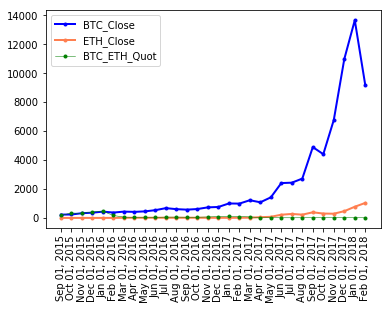

In [129]:
plt.plot('Date', 'BTC_Close', data=fom_df, marker='o', markersize=3, color='blue', linewidth=2)
plt.plot('Date', 'ETH_Close', data=fom_df, marker='o', markersize=3, color='coral', linewidth=2)
plt.plot('Date', 'BTC_ETH_Quot', data=fom_df, marker='o', markersize=3, color='green', linewidth=0.5)
plt.legend()
plt.gca().axes.get_xaxis().set_ticklabels([])
plt.xticks(fom_df['Date'], fom_df['Date'], rotation='vertical')
plt.show()